In [1]:
# import libraries for machine learning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data
data = pd.read_csv('alzheimers_disease_data.csv')

In [3]:
# Display the first 5 rows of the data
data.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [4]:
# Display the information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [5]:
# Calcular el porcentaje de cada clase en la variable objetivo "Diagnosis"
class_distribution = data['Diagnosis'].value_counts(normalize=True) * 100
print(class_distribution)

Diagnosis
0    64.634714
1    35.365286
Name: proportion, dtype: float64


In [6]:
# Drop Patient ID column and Doctor's name column
data = data.drop(['PatientID', 'DoctorInCharge'], axis=1)

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [8]:
# Separate features and target variable
x=data.drop("Diagnosis",axis=1)
y=data["Diagnosis"]

In [9]:
# Split the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [10]:
# Define the parameter grid for GridSearchCV
grid_param={
    "n_estimators":[100,200,300],
    "max_depth":[10,20,30],
    "min_samples_split":[2,5,10]
}

# Perform GridSearchCV to find the best hyperparameters
grid=GridSearchCV(RandomForestClassifier(),grid_param,cv=5)
grid.fit(x_train,y_train)


# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid.best_params_)

Best Parameters: {'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 100}


In [11]:
# Train the model with the best parameters
best_params = grid.best_params_
rfc = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                             max_depth=best_params['max_depth'],
                             min_samples_split=best_params['min_samples_split'])
model = rfc.fit(x_train, y_train)

In [12]:
# Evaluate the model on the test set
y_pred = model.predict(x_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.9395348837209302
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       277
           1       0.96      0.87      0.91       153

    accuracy                           0.94       430
   macro avg       0.94      0.92      0.93       430
weighted avg       0.94      0.94      0.94       430



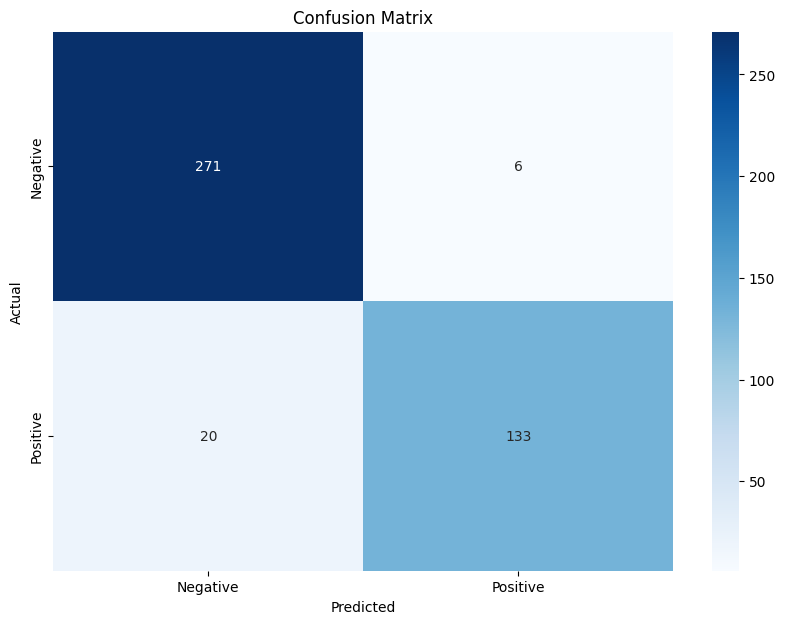

In [13]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

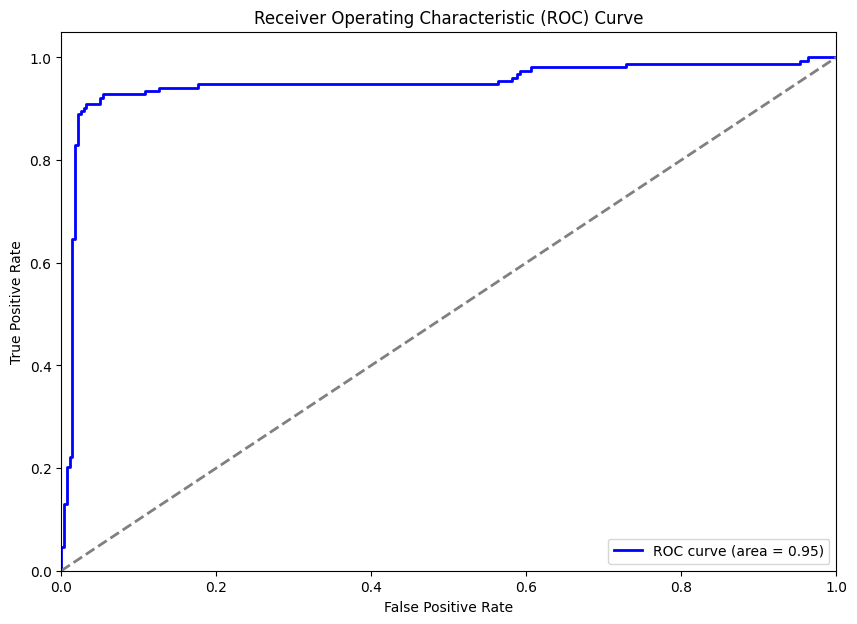

In [14]:
# ROC Curve and AUC
y_pred_proba = model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [16]:
# Define the parameter grids for GridSearchCV
param_grids = {
    "LogisticRegression": {
        "C": [0.1, 1, 10],
        "solver": ['liblinear']
    },
    "SVM": {
        "C": [0.1, 1],
        "gamma": [0.1, 0.01],
        "kernel": ['rbf']
    },
    "KNN": {
        "n_neighbors": [3, 5],
        "weights": ['uniform', 'distance']
    },
    "GradientBoosting": {
        "n_estimators": [100, 200],
        "learning_rate": [0.1, 0.2],
        "max_depth": [3, 4]
    }
}

In [17]:
# Define the models to be tested
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "GradientBoosting": GradientBoostingClassifier()
}

Performing GridSearchCV for LogisticRegression...
Best Parameters for LogisticRegression: {'C': 10, 'solver': 'liblinear'}
Model: LogisticRegression
Accuracy: 0.8302325581395349
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87       277
           1       0.79      0.71      0.75       153

    accuracy                           0.83       430
   macro avg       0.82      0.80      0.81       430
weighted avg       0.83      0.83      0.83       430



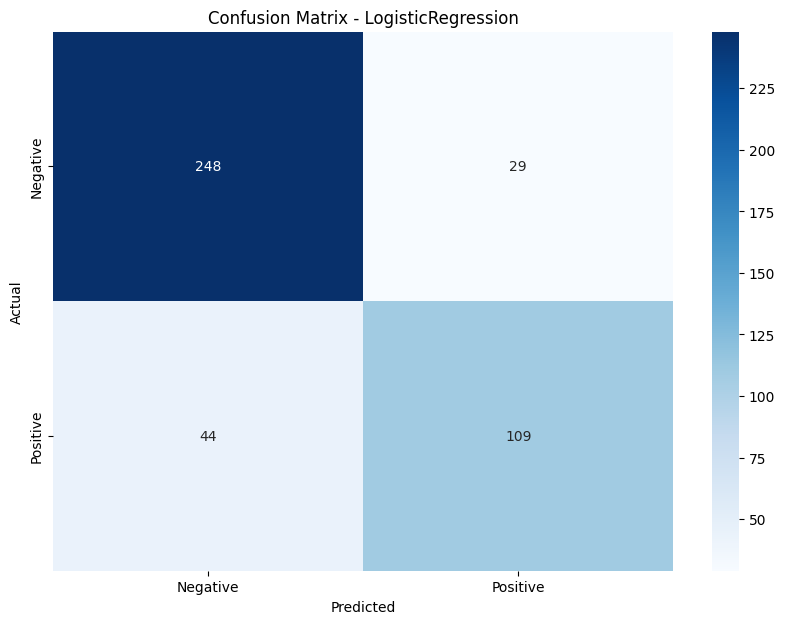

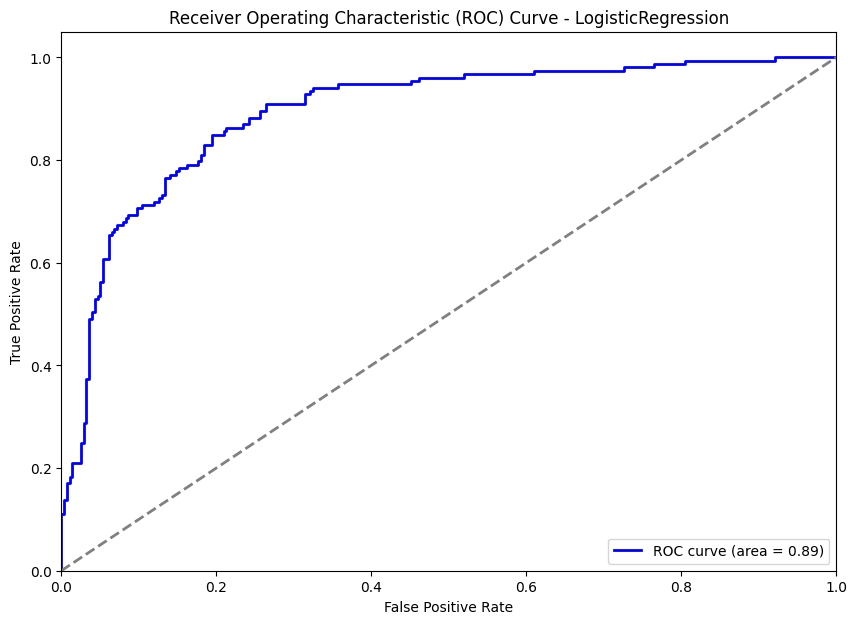

Performing GridSearchCV for SVM...
Best Parameters for SVM: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
Model: SVC
Accuracy: 0.6441860465116279
Classification Report:
               precision    recall  f1-score   support

           0       0.64      1.00      0.78       277
           1       0.00      0.00      0.00       153

    accuracy                           0.64       430
   macro avg       0.32      0.50      0.39       430
weighted avg       0.41      0.64      0.50       430



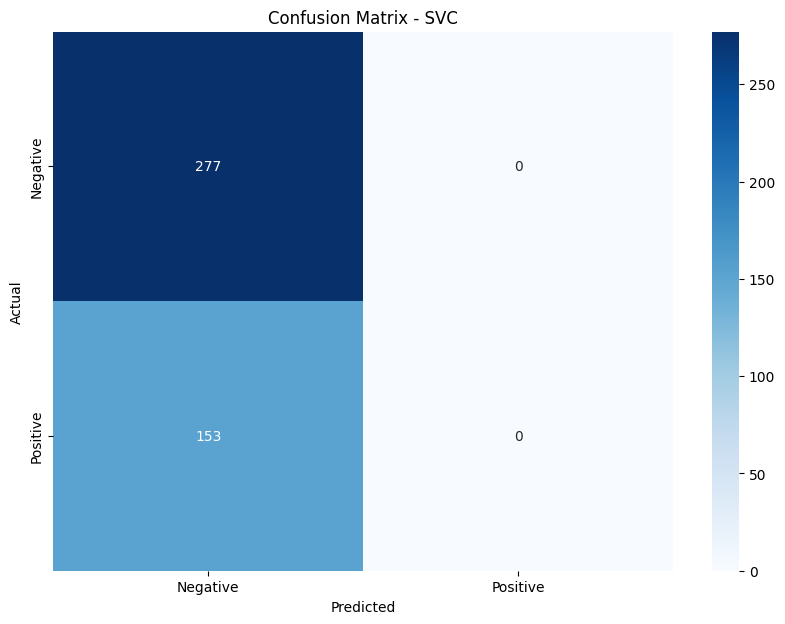

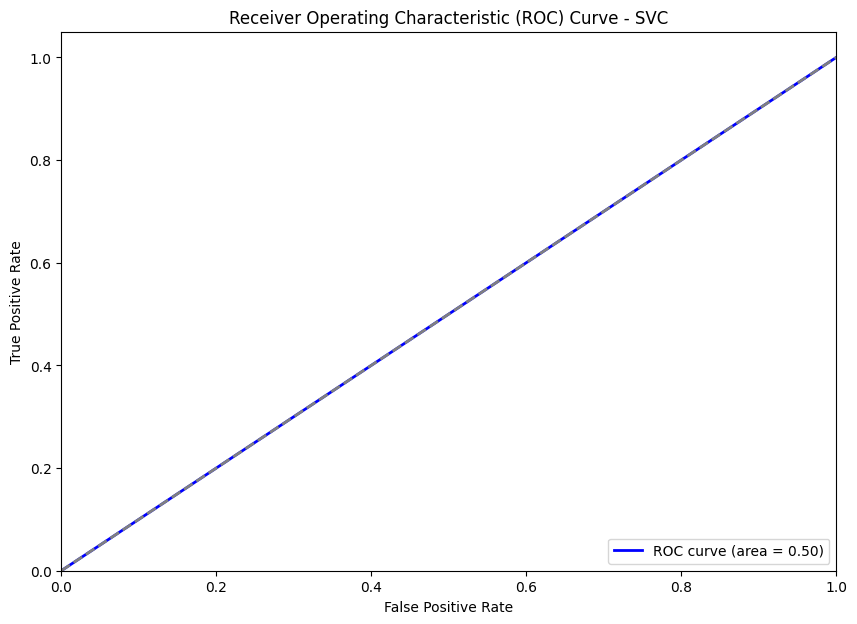

Performing GridSearchCV for KNN...
Best Parameters for KNN: {'n_neighbors': 5, 'weights': 'uniform'}
Model: KNeighborsClassifier
Accuracy: 0.5395348837209303
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.73      0.67       277
           1       0.29      0.20      0.24       153

    accuracy                           0.54       430
   macro avg       0.46      0.46      0.45       430
weighted avg       0.50      0.54      0.52       430



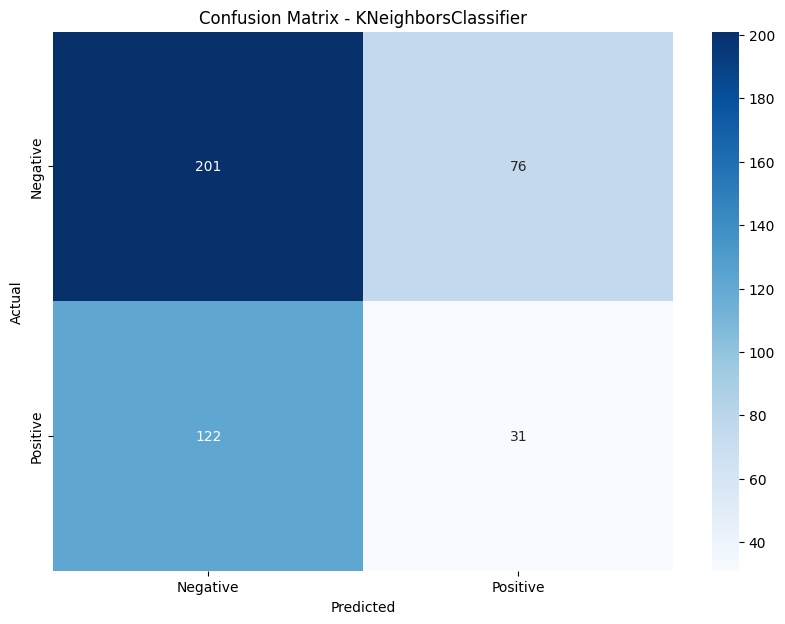

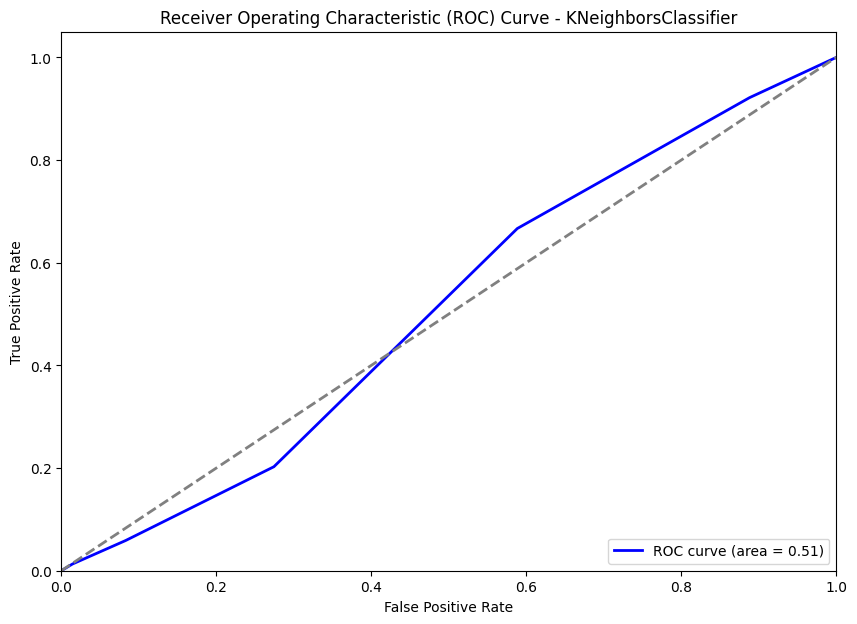

Performing GridSearchCV for GradientBoosting...
Best Parameters for GradientBoosting: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
Model: GradientBoostingClassifier
Accuracy: 0.9511627906976744
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       277
           1       0.96      0.90      0.93       153

    accuracy                           0.95       430
   macro avg       0.95      0.94      0.95       430
weighted avg       0.95      0.95      0.95       430



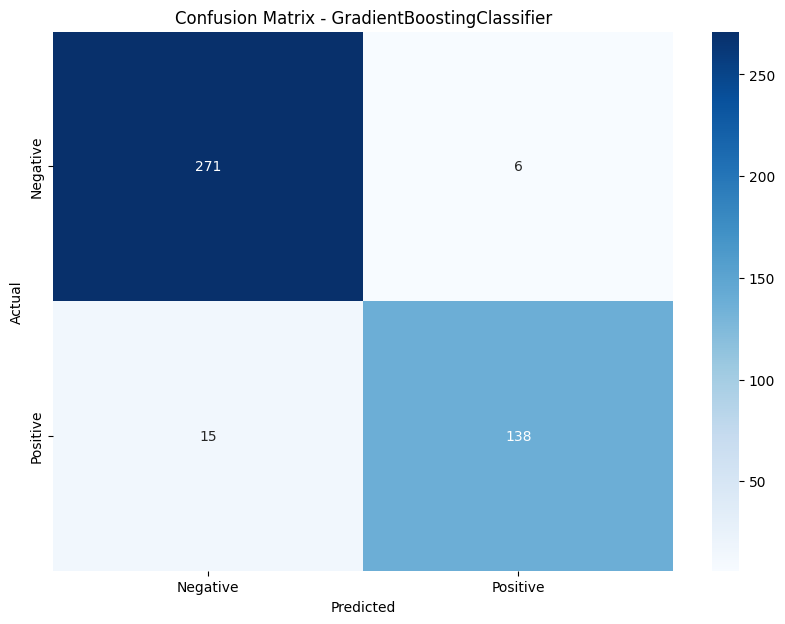

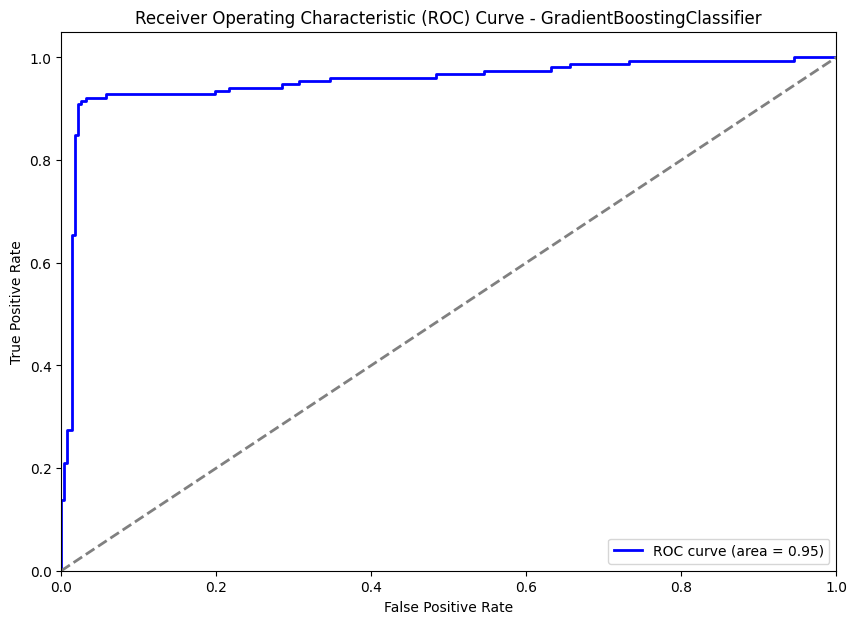

In [18]:
# Function to evaluate and plot results for each model
def evaluate_model(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred_proba = model.predict_proba(x_test)[:, 1]
    
    # Accuracy and Classification Report
    print(f"Model: {model.__class__.__name__}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model.__class__.__name__}')
    plt.show()
    
    # ROC Curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(10, 7))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {model.__class__.__name__}')
    plt.legend(loc="lower right")
    plt.show()

# Perform GridSearchCV and evaluate each model
for model_name, model in models.items():
    print(f"Performing GridSearchCV for {model_name}...")
    grid = GridSearchCV(model, param_grids[model_name], cv=5)
    grid.fit(x_train, y_train)
    
    # Print the best parameters found by GridSearchCV
    print(f"Best Parameters for {model_name}:", grid.best_params_)
    
    # Evaluate the model with the best parameters
    best_model = grid.best_estimator_
    evaluate_model(best_model, x_train, x_test, y_train, y_test)